In [9]:
%pylab inline
def fit_and_plot(x,y,xlabel="",ylabel="",title="",zeroed=False,annotate_fit= True,right_words = False,error_bar="",sci_lim = False,annotate="",right_annotate=False,marker='o'):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x,y,'{}'.format(marker))
    z = np.polyfit(x,y, 1) 
    p = np.poly1d(z)
    if zeroed : 
        a = np.linspace(0,max(x))
    else:
        a = np.linspace(min(x),max(x))
    ax1.plot(a, p(np.linspace(min(x),max(x))),color="red")
    if annotate_fit: 
        slope = z[0]
        intercept = z[1]
        if right_words:    
            ax1.text(0.48,0.85,"y= %.5f x + %.5f"%(slope,intercept), fontsize=13,transform=ax1.transAxes)
        else:
            ax1.text(0.03,0.85,"y= %.5f x + %.5f"%(slope,intercept), fontsize=13,transform=ax1.transAxes)
    if title !="":
        plt.title(title,fontsize=13 )    
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    if annotate!="":
        if right_annotate: 
            ax1.text(0.48,0.85,annotate, fontsize=13,transform=ax1.transAxes)
    if error_bar!="":
        ax1.errorbar(x, y, yerr=error_bar, fmt='o')
    if sci_lim:
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    return p

Populating the interactive namespace from numpy and matplotlib


In [14]:
freq_pos = np.array([3.904,3.500,3.000,2.500,2.000,1.500,1.000,0.7,0.5,0.2])
I_pos = np.array([1.84,1.63,1.40,1.15,0.9,0.66,0.41,0.26,0.16,0.0])
freq_neg = np.array([3.900,3.500,3.000,2.500,2.000,1.500,1.000,0.7,0.5,0.2,0.1])
I_neg = -np.array([1.98,1.78,1.53,1.29,1.04,0.79,0.55,0.40,0.30,0.11,0.06])
I_mega = list(I_neg)+list(I_pos)
freq_mega = list(freq_neg)+list(freq_pos)
freq2_neg = np.array([3.900,3.500,3.000,2.500,2.000,1.500,1.000,0.7,0.5,0.2])
I2_neg = -np.array([1.35,1.21,1.05,0.88,0.71,0.55,0.38,0.28,0.21,0.06])
freq2_pos = np.array([3.904,3.500,3.000,2.500,2.000,1.500,1.000,0.7,0.5,0.2])
I2_pos = np.array([1.22,1.06,0.89,0.73,0.56,0.41,0.24,0.14,0.07,0.02])
I2_mega = list(I2_neg)+list(I2_pos)
freq2_mega = list(freq2_neg)+list(freq2_pos)

In [11]:
def I_to_B(I):
    N = 135 #turns
    a = 0.275 #meters
    return 0.9e-6 * N*np.array(I)/a

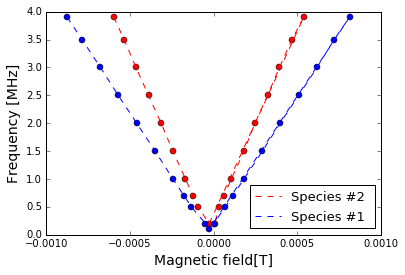

In [12]:
from matplotlib.legend_handler import HandlerLine2D
N = 135 #turns
a = 0.275 #meters
B_mega = I_to_B(I_mega)
B2_mega = I_to_B(I2_mega)

plt.plot(B2_mega,freq2_mega,'o',color = "red")
plt.plot(B2_mega,freq2_mega,'--',color = "red",label = "Species #2 ")
plt.plot(B_mega,freq_mega,'o',color = "blue")
plt.plot(B_mega,freq_mega,'--',color = "blue",label = "Species #1 ")
plt.legend(loc='lower right',prop={'size':13},numpoints=1)
plt.title("",fontsize=14)
plt.xlabel("Magnetic field[T]" ,fontsize=14)
plt.ylabel("Frequency [MHz]",fontsize=14)

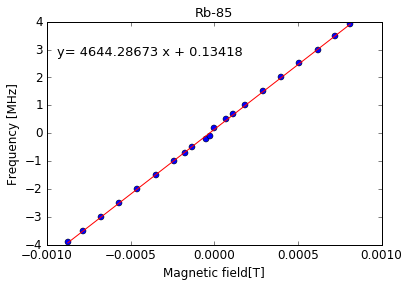

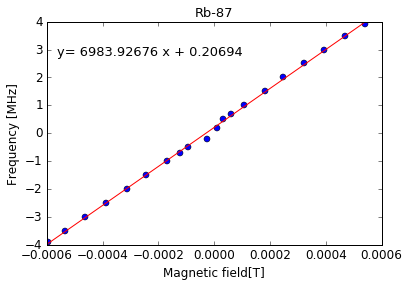

In [88]:
I_mega_line = list(I_neg)+list(I_pos)
freq_mega_line = list(-freq_neg)+list(freq_pos)
I2_mega_line = list(I2_neg)+list(I2_pos)
freq2_mega_line = list(-freq2_neg)+list(freq2_pos)

spec1_fit = fit_and_plot(I_to_B(I_mega_line),freq_mega_line,xlabel="Magnetic field[T]",ylabel="Frequency [MHz]",title = "Rb-85")#,error_bar = np.ones_like(I_mega)*0.01)
spec2_fit = fit_and_plot(I_to_B(I2_mega_line),freq2_mega_line,xlabel="Magnetic field[T]",ylabel="Frequency [MHz]",title = "Rb-87")


### Estimate of the Earth's magnetic field 

At the zero current point, the magnetic field is zero and have no magnetic field contribution from the Helmholtz coil so $B_{total} = B_{earth}$. This could also be thought of as the y intercept of the linear regression: 
$$ B_H = \frac{(2I+1)}{2.799} \nu - B_e$$.

In [21]:
print  0.9e-6 * N*spec1_fit[0]/a ,"teslas"
print  0.9e-6 * N*spec2_fit[0]/a ,"teslas"

5.92823442548e-05 teslas
9.1428498284e-05 teslas


The actual total magnetic field in Berkeley is 48.6 $\mu T$

In order to decrease the error on the parameters for linear regression (y = ax+b), we flipped the negative data along the x axis so that we could perform two linear fits so that we have double the size of the sample. 

$$ I = \frac{1}{2}\Bigg(\frac{2.799}{a} -1 \Bigg) $$


In [25]:
spec1_fit[1]

4644.2867320091918

In [24]:
print 0.5*( 2.799/spec1_fit[1] -1 )
print 0.5*( 2.799/spec2_fit[1] -1 )

-0.499698662016
-0.499799611301


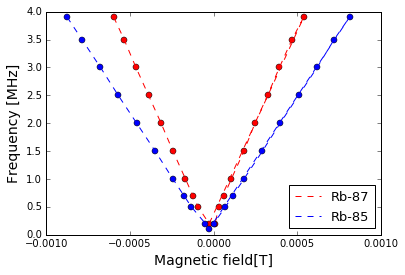

In [83]:
plt.plot(B2_mega,freq2_mega,'o',color = "red")
# plt.plot(B2_mega,freq2_mega,'--',color = "red",label = "Species #2 ")
plt.plot(B2_mega,freq2_mega,'--',color = "red",label = "Rb-87")
plt.plot(B_mega,freq_mega,'o',color = "blue")
# plt.plot(B_mega,freq_mega,'--',color = "blue",label = "Species #1 ")
plt.plot(B_mega,freq_mega,'--',color = "blue",label = "Rb-85")
plt.legend(loc='lower right',prop={'size':13},numpoints=1)
plt.title("",fontsize=14)
plt.xlabel("Magnetic field[T]" ,fontsize=14)
plt.ylabel("Frequency [MHz]",fontsize=14)

In [28]:
np.array(freq_mega[:-1])/np.array(freq2_mega)

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        0.02561475,  1.11542857,  1.16666667,  1.2       ,  1.25      ,
        1.33333333,  1.5       ,  1.42857143,  1.4       ,  2.5       ])

In [30]:
1./(B_mega[:-1]/B2_mega)

array([  0.68181818,   0.67977528,   0.68627451,   0.68217054,
         0.68269231,   0.69620253,   0.69090909,   0.7       ,
         0.7       ,   0.54545455, -20.33333333,   0.57608696,
         0.54601227,   0.52142857,   0.48695652,   0.45555556,
         0.36363636,   0.34146341,   0.26923077,   0.125     ])

In [32]:
2/3.

0.6666666666666666

For species 1 : 


In [68]:
I = 2.5
B_guess = (2*I+1)/2.799*np.array(freq_mega)-48.6e-6
B_actual = abs(B_mega)*1e4

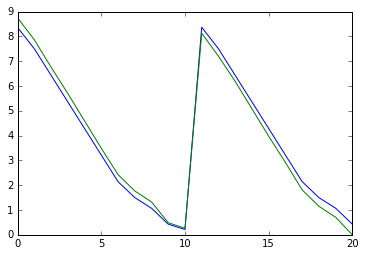

In [69]:
plt.plot(B_guess)
plt.plot(B_actual)

In [70]:
mean((B_guess-B_actual)**2)

0.091511448991768482

For species 2 : 

In [79]:
I = 1.5
B2_guess = (2*I+1)/2.799*np.array(freq2_mega)-48.6e-6
B2_actual = abs(B2_mega)*1e4
# plt.plot(B_guess)
# plt.plot(B_actual)

mean((B2_guess-B2_actual)**2)

0.097268324274124823

In [82]:
(B_guess*1e-4*a/N/I_mega)[:-1]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


array([ -8.60090537e-07,  -8.58603207e-07,  -8.56197231e-07,
        -8.46240170e-07,  -8.39728727e-07,  -8.29096116e-07,
        -7.93916342e-07,  -7.64137054e-07,  -7.27740146e-07,
        -7.93844342e-07,  -7.27608146e-07,   9.26481477e-07,
         9.37615772e-07,   9.35701260e-07,   9.49260713e-07,
         9.70353195e-07,   9.92402927e-07,   1.06500973e-06,
         1.17559547e-06,   1.36451277e-06])

In [80]:
mean(B2_guess*1e-4*a/N/I_mega[:-1])

-9.9626112557009977e-07

error on the fit: 

$\sigma_a ^2 = S_{xx}/\bigtriangleup$

$\sigma_b^2 = S/\bigtriangleup$

where $\bigtriangleup = SS_{xx}-(S_x)^2$,$ S_{xx} = \sum^N_{i=1}\frac{x_i^2}{\sigma_i^2}$, $S_x = \sum^N_{i=1}\frac{x_i}{\sigma_i^2}$, $S =\sum^N_{i=1}\frac{1}{\sigma_i} $

In [98]:
S_x = sum(B_mega/0.001**2)
S_xx = sum(B_mega**2/0.001**2)
S = sum(1/0.001**2)
delta = S*S_xx-S_x**2
# print delta
print "For species 1 : "
print "error on fitted slope =", S_xx/delta
print "error on intercept =", S/delta

For species 1 : 
error on fitted slope = 1.09089761621e-06
error on intercept = 0.230934403605


In [100]:
S_x = sum(B2_mega/0.001**2)
S_xx = sum(B2_mega**2/0.001**2)
S = sum(1/0.001**2)
delta = S*S_xx-S_x**2
# print delta
print "For species 2 : "
print "error on fitted slope =", S_xx/delta
print "error on intercept =", S/delta

For species 2 : 
error on fitted slope = 1.20071091637e-06
error on intercept = 0.572630173934


In [110]:
fc1  = np.poly1d([4644.29, 0.1342])
fc2  = np.poly1d([ 6983.93,0.2069])
print sum((fc1(B_mega) - freq_mega)**2/freq_mega)/len(freq_mega)
print sum((fc2(B2_mega) - freq2_mega)**2/freq2_mega)/len(freq2_mega)

3.57085081353
3.72395743657
